In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train_df.drop(['label'],axis=1)
y = train_df['label']

In [5]:
train_df.isnull().any().sum()

0

In [6]:
X.shape

(42000, 784)

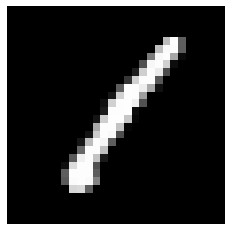

In [7]:
import matplotlib.pyplot as plt
img = X.iloc[0].values
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
X = X/255.0

In [9]:
print(X.shape)

X = X.values.reshape((-1,28,28,1))

print(X.shape)

(42000, 784)
(42000, 28, 28, 1)


In [10]:
from tensorflow.keras.utils import to_categorical
num_classes = 10

y = to_categorical(y,num_classes)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.01,random_state=5)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import regularizers, models, layers
img_rows = 28
img_cols = 28

In [41]:
weight_decay = 1e-4
base_hidden_units = 32

model = Sequential()

#CONV1
model.add(Conv2D(base_hidden_units, kernel_size=(3,3),
          activation='relu',
          padding='same',
          input_shape=(img_rows,img_cols,1),
          kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

#CONV2
model.add(Conv2D(base_hidden_units,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#CONV3
model.add(Conv2D(2*base_hidden_units,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
#model.add(Dropout(0.25))

#CONV4
model.add(Conv2D(2*base_hidden_units,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#CONV5
model.add(Conv2D(4*base_hidden_units,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

#CONV6
model.add(Conv2D(4*base_hidden_units,(3,3),activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
#model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
            )

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_41 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_42 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 14, 14, 64)      

In [42]:
batch_size = 128
epochs = 30

model.fit(X_train,y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,y_test))

score = model.evaluate(X_test,y_test, verbose=0)
print("loss: ", score[0])
print("accuracy: ", score[1])

Epoch 1/30
325/325 [==============================] - 5s 11ms/step - loss: 0.3652 - accuracy: 0.9130 - val_loss: 1.2626 - val_accuracy: 0.5476
Epoch 2/30
325/325 [==============================] - 3s 9ms/step - loss: 0.1172 - accuracy: 0.9769 - val_loss: 0.0843 - val_accuracy: 0.9857
Epoch 3/30
325/325 [==============================] - 3s 9ms/step - loss: 0.0962 - accuracy: 0.9826 - val_loss: 0.0522 - val_accuracy: 0.9976
Epoch 4/30
325/325 [==============================] - 3s 10ms/step - loss: 0.0866 - accuracy: 0.9864 - val_loss: 0.0473 - val_accuracy: 0.9976
Epoch 5/30
325/325 [==============================] - 3s 9ms/step - loss: 0.0784 - accuracy: 0.9879 - val_loss: 0.0502 - val_accuracy: 0.9952
Epoch 6/30
325/325 [==============================] - 3s 10ms/step - loss: 0.0761 - accuracy: 0.9891 - val_loss: 0.0539 - val_accuracy: 0.9905
Epoch 7/30
325/325 [==============================] - 3s 10ms/step - loss: 0.0693 - accuracy: 0.9909 - val_loss: 0.0501 - val_accuracy: 0.9976
Ep

In [43]:
X_train_final = test_df.values.reshape((-1,28,28,1))
X_train_final = X_train_final/255.0

In [44]:
X_train_final.shape

(28000, 28, 28, 1)

In [45]:
predictions = model.predict(X_train_final)

In [46]:
y_classes = predictions.argmax(axis=1)

In [47]:
y_classes

array([2, 0, 9, ..., 3, 9, 2])

In [48]:
my_submission = pd.DataFrame({'ImageId': range(1,28001),
                             'Label': y_classes})
my_submission.to_csv('/kaggle/working/submission.csv', index=False)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              